## **Statistiek 2 – Practicumopdracht 2**  
  
Namen: Fenne van Agthoven en Araksan Hassan   
Studie: Toegepaste Wiskunde  
Docent: Emiel Kaper  
Datum: 10 juni 2024  


Opgave 1 – Vorstinnen en vorst (10 pt)  
Hieronder volgt een drietal geformuleerde vermoedens. Ga na, met behulp
van de aangereikte dataset en de technieken die je bij dit vak aan bod
gekomen zijn, of deze vermoedens gegrond zijn. Hanteer steeds een
significantieniveau α =0 , 05. Geef steeds aan:  
 welke hypothesetoets je gebruikt, en waarom die het meest geschikt
is;  
 de Python-code waarmee je de hypothesetoets uitvoert, en de
output die daaruit komt;  
 welke conclusie je trekt op basis van de output van Python, waarbij
je de conclusie ook weer terugvertaalt naar de context van het
vermoeden.  

Sinds 1949, na de troonsbestijging van Juliana, wordt Koninginnedag
gevierd op 30 april. Nadat Willem-Alexander koning was geworden werd
Koningsdag vanaf 2014 op 27 april gevierd. Hoewel dat dus maar drie
dagen eerder was, ontdekte de weervrouw dat het op Koningsdag echt
kouder is dan op Koninginnedag, meer dan 1 °C.  
a) Klopt de bewering van de weervrouw statistisch gezien? Met andere
woorden: was het op Koninginnedag significant warmer dan op
Koningsdag?  

Clichés hebben vaak een kern van waarheid. Zo wordt er wel beweerd dat
een nieuw staatshoofd ook een andere wind laat waaien. Met onze data
kunnen we vermoeden dat onderzoeken.  
b) Waait de wind bij een ander staatshoofd ook echt uit een andere
richting? Met andere woorden: zijn staatshoofd en windrichting
onafhankelijke stochasten?  

In april en augustus is er zelden vorst aan de grond. Er is wel elke dag een
minimumtemperatuur en een maximumtemperatuur. Uiteraard is de
maximumtemperatuur hoger dan de minimumtemperatuur. Maar wanneer
treden die op?  
c) Het vermoeden is dat de minimumtemperatuur eerder op de dag
plaatsvindt dan de maximumtemperatuur. Klopt dit vermoeden?  

***a) Klopt de bewering van de weervrouw statistisch gezien? Met andere woorden: was het op Koninginnedag significant warmer dan op Koningsdag?
Clichés hebben vaak een kern van waarheid. Zo wordt er wel beweerd dat een nieuw staatshoofd ook een andere wind laat waaien. Met onze data kunnen we vermoeden dat onderzoeken.***

Voor deze bewering gebruiken wij de ongepaarde T-toets, omdat de temperaturen op de verschillende dagen onafhankelijk van elkaar zijn.  

Nulhypothese (H0): De gemiddelde temperatuur op Koninginnedag is gelijk aan de gemiddelde temperatuur op Koningsdag.  
H0:μKoninginnedag=μKoningsdag
Alternatieve hypothese (Ha): De gemiddelde temperatuur op Koninginnedag is hoger dan de gemiddelde temperatuur op Koningsdag.  
Ha:μKoninginnedag>μKoningsdagHa

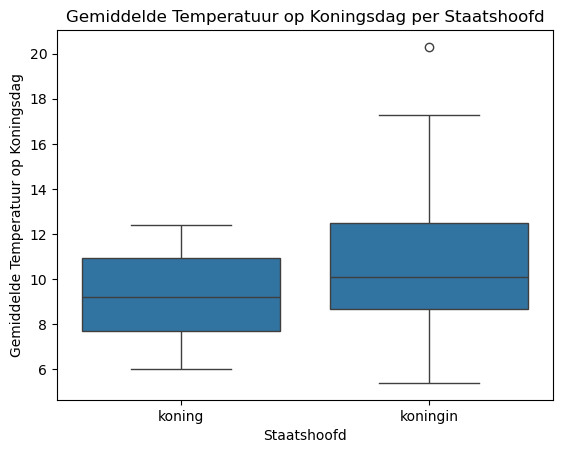

In [33]:
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
etmgeg = pd.DataFrame(pd.read_csv('etmgeg2.csv'))

koningsdag_willem = etmgeg[(etmgeg['Staatshoofd'] == 'Willem-Alexander') & (etmgeg['Datum'].str.startswith('27-4'))]
koningsdag_juliana_beatrix = etmgeg[((etmgeg['Staatshoofd'] == 'Juliana') & (etmgeg['Datum'].str.startswith('30-4')) | (etmgeg['Staatshoofd'] == 'Beatrix')) & (etmgeg['Datum'].str.startswith('30-4'))]
koningsdag = pd.concat([koningsdag_willem, koningsdag_juliana_beatrix])

koningsdag['Staatshoofd'] = koningsdag['Staatshoofd'].replace('Juliana', 'koningin')
koningsdag['Staatshoofd'] = koningsdag['Staatshoofd'].replace('Beatrix', 'koningin')
koningsdag['Staatshoofd'] = koningsdag['Staatshoofd'].replace('Willem-Alexander', 'koning')

sns.boxplot(x='Staatshoofd', y='TempGem', data=koningsdag)
plt.xlabel('Staatshoofd')
plt.ylabel('Gemiddelde Temperatuur op Koningsdag')
plt.title('Gemiddelde Temperatuur op Koningsdag per Staatshoofd')
plt.show()



***b) Waait de wind bij een ander staatshoofd ook echt uit een andere richting? Met andere woorden: zijn staatshoofd en windrichting onafhankelijke stochasten?***

voor deze bewering gebruiken wij de chi-kwadraattoets, omdat we kijken naar twee categorische variabelen.  

Nulhypothese (H0): Staatshoofd en windrichting zijn onafhankelijk van elkaar.  
Alternatieve hypothese (Ha): Staatshoofd en windrichting zijn niet onafhankelijk.

***c) Het vermoeden is dat de minimumtemperatuur eerder op de dag
plaatsvindt dan de maximumtemperatuur. Klopt dit vermoeden?***

TempMinUur  
TempMaxUur

Om te bepalen of het vermoeden klopt dat de minimumtemperatuur eerder op de dag plaatsvindt dan de maximumtemperatuur, maken wij gebruik van een gepaarde t-toets. Deze toets is geschikt omdat je twee metingen per dag hebt die op dezelfde dag zijn genomen en dus aan elkaar gekoppeld zijn.

Nulhypothese (H0): De tijdstippen van de minimumtemperatuur en de maximumtemperatuur zijn gemiddeld genomen gelijk. Dit impliceert dat er geen systematisch verschil is in de tijdstippen waarop de minimum- en maximumtemperaturen optreden.  
Alternatieve hypothese (Ha): De minimumtemperatuur treedt gemiddeld eerder op de dag op dan de maximumtemperatuur.